In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib notebook

# PMF

Let's look at the example where we flipped a fair coin 3 times and calculate the PMF using the **pmf** function from the **scipy.stats** library.

>scipy.stats.binom.pmf(#Heads, # of flips, prob. of Heads/Tails)

binom is short for binomial distribution, which the PMF here follows. More on the distribution later.

In [2]:
n =3
p = 0.5
i = 0
while (i <= n):
    print('P(',i,'Heads) = ',st.binom.pmf(i,n,p)) #frequency, number of flips, probability of Heads or Tails
    i += 1
    

P( 0 Heads) =  0.125
P( 1 Heads) =  0.3750000000000001
P( 2 Heads) =  0.3750000000000001
P( 3 Heads) =  0.125


We can generate a random array of values governed by this distribution which should reproduce our PMFs found above. This can be done with the **rvs** function from the **scipy.stats** library:

> scipy.stats.binom.rvs(# flips per trial, probability of Heads/Tails, # trials)

<IPython.core.display.Javascript object>


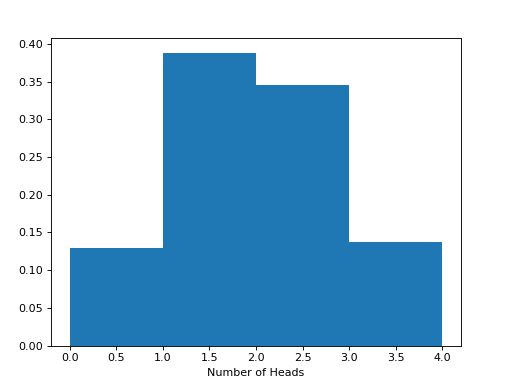

In [3]:
np.random.seed(0)
n = 3
p = 0.5
trials=1000
outcome = st.binom.rvs(n,p,size=trials)

#plot it
fig = plt.figure('Coin Toss PMF')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.hist(outcome,bins=n+1,range=(0,n+1),density=True);
ax.set_xlabel('Number of Heads')

ax = plt.gca(); # get axis handle

In [4]:
p = ax.patches
Ptotal = 0.0
for i in range (len(p)):
    Pi = p[i].get_height()*p[i].get_width()
    print(i,' Heads: ',Pi)
    Ptotal += Pi
print('Total:', Ptotal)    

0  Heads:  0.129
1  Heads:  0.388
2  Heads:  0.346
3  Heads:  0.137
Total: 1.0


# Joint PMF

In [5]:
# rolling a die once and getting an even number or an odd number
evens = np.array([2, 4, 6])
odds = np.array([1, 3, 5])
greater_than_two = np.array([3, 4, 5, 6])
all_possible_rolls = np.array([1, 2, 3, 4, 5, 6])

The probability of rolling an even numberm, odd number, and number larger than 2:

In [6]:
prob_evens = len(evens)/len(all_possible_rolls)
prob_odds = len(odds)/len(all_possible_rolls)
prob_greater_than_two = len(greater_than_two)/len(all_possible_rolls)

print('Prob. of rolling an even number: ',prob_evens)
print('Prob. of rolling an odd number: ',prob_odds)
print('Prob. of rolling an number > 2: ',prob_greater_than_two)

Prob. of rolling an even number:  0.5
Prob. of rolling an odd number:  0.5
Prob. of rolling an number > 2:  0.6666666666666666


To find the probability of rolling an even number **and** number greater than 2, we will use Numpy's **intersect1d** method that returns common 1D array elements.

In [7]:
intersect = np.intersect1d(evens,greater_than_two)
print('intersection',intersect)

prob_even_greater_than_two = len(intersect)/len(all_possible_rolls)
print('Prob. of rolling an even number and > 2: ',prob_even_greater_than_two)

intersection [4 6]
Prob. of rolling an even number and > 2:  0.3333333333333333


The probability of rolling an even number **or** number greater than 2:

In [8]:
prob_or = prob_evens + prob_greater_than_two - prob_even_greater_than_two
print('Prob. of rolling an even number or > 2: ',prob_or)

Prob. of rolling an even number or > 2:  0.8333333333333333


# CDF 

Let's find the CDF of getting 1 or 2 heads. To do this we will use the **cdf** function from the **scipy.stats** library:
> scipy.stats.binom.cdf(x, n, p)

* x = value of interest. Looking for this value **or** less
* n = sample size (how many times did we flip the coin)
* p = event probability (probability of getting Heads or Tails)

In [9]:
print(st.binom.cdf(2,3,0.5) - st.binom.cdf(0,3,0.5))

0.75


In [10]:
print(st.binom.pmf(1,3,0.5)+st.binom.pmf(2,3,0.5))

0.7500000000000002


# In Class Problem

### PMF
If you roll a 6-sided dice 10 times, what is the probability of having the number 4 show up 6 times?
Hint: use 
>st.binom.pmf()

In [36]:
nd = 10
pd = 1/6
a = st.binom.pmf(6,nd,pd) 


print(a) 




0.0021706350340395257


### Bonus

See if you can histogram the PMF distribution using 
> scipy.stats.binom.rvs()

<IPython.core.display.Javascript object>


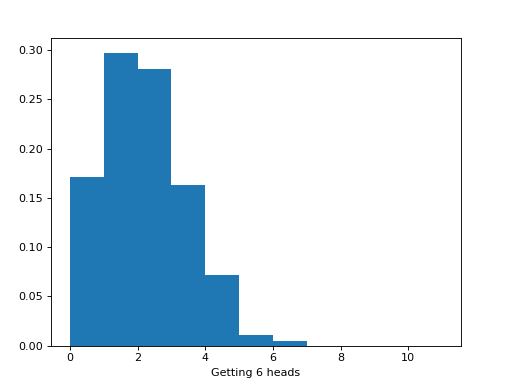

In [37]:
trialsd = 1000
outcome = st.binom.rvs(nd,pd,size=trialsd)

fig = plt.figure('Dice Roll to get exactly 6 4s given 10 rolls')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.hist(outcome,bins=n+1,range=(0,n+1),density=True);
ax.set_xlabel('Getting 6 heads')

ax = plt.gca(); # get axis handle